In [1]:
import pandas as pd

# Read the merged CSV file
file_path = "merged_output_all.csv"
df = pd.read_csv(file_path, dtype=str)

# # Convert 'year' column to integer for trend analysis
# df["year"] = df["year"].astype(int)

# Display first few rows
df.head()

,MDR_REPORT_KEY,DEVICE_EVENT_KEY,IMPLANT_FLAG,DATE_REMOVED_FLAG,DEVICE_SEQUENCE_NO,DATE_RECEIVED,BRAND_NAME,GENERIC_NAME,MANUFACTURER_D_NAME,MANUFACTURER_D_ADDRESS_1,...,COMBINATION_PRODUCT_FLAG,UDI-DI,UDI-PUBLIC,year_x,MDR_TEXT_KEY,TEXT_TYPE_CODE,PATIENT_SEQUENCE_NUMBER,DATE_REPORT,FOI_TEXT,year_y
0,9537111,NaN,NaN,NaN,1,2020/01/01,SIMPLY LEGACY 2 IMPLANT,DENTAL IMPLANT,IMPLANT DIRECT SYBRON MANUFACTURING LLC,3050 EAST HILLCREST DRIVE,...,N,10841307107415,10841307107415,2020,173287063,D,1,NaN,"PER COMPLAINT (B)(4), AFTER CLINICAL PROCEDURE...",2020
1,9537306,NaN,NaN,NaN,1,2020/01/02,"ELEMENT IMPL., PF Ø 4.5, E Ø 4.2, L 14.0",DENTAL IMPLANT,THOMMEN MEDICAL AG,NECKARSULMSTRASSE 28,...,N,07640156471441,7640156471441,2020,173274047,D,1,NaN,"LOSS OF OSSEOINTEGRATION, PRIMARY STABILITY WA...",2020
2,9537307,NaN,NaN,NaN,1,2020/01/02,"ELEMENT RC INICELL, PF 3.5, E 3.5, L9.5",DENTAL IMPLANT,THOMMEN MEDICAL AG,NECKARSULMSTRASSE 28,...,N,07640156471304,7640156471304,2020,173274060,D,1,NaN,"IMPLANT DIDN'T ACHIEVE OSSEOINTEGRATION, IMPLA...",2020
3,9537308,NaN,NaN,NaN,1,2020/01/02,"CONTACT RC INICELL, PF 4.0, E 3.5, L9.5",DENTAL IMPLANT,THOMMEN MEDICAL AG,NECKARSULMSTRASSE 28,...,N,NaN,NaN,2020,173273734,D,1,NaN,"IMPLANT DIDN'T ACHIEVE OSSEOINTEGRATION, PRIMA...",2020
4,9537309,NaN,NaN,NaN,1,2020/01/02,"ELEMENT IMPL. RC INICELL® 3.0, L 12.5",DENTAL IMPLANT,THOMMEN MEDICAL AG,NECKARSULMSTRASSE 28,...,N,07640156478556,7640156478556,2020,173274657,D,1,NaN,"IMPLANT DIDN'T ACHIEVE OSSEOINTEGRATION, PRIMA...",2020


In [2]:
df["TEXT_TYPE_CODE"].value_counts()

TEXT_TYPE_CODE
D    2447112
N    1187509
Name: count, dtype: int64

In [3]:
# Count the number of reports per device genre per year
df_trend = df.groupby(["GENERIC_NAME", "year_y"]).size().reset_index(name="count")

# Display the first few rows
df_trend.head(15)

,GENERIC_NAME,year_y,count
0,DENTAL IMPLANT,2020,41830
1,DENTAL IMPLANT,2021,54322
2,DENTAL IMPLANT,2022,50311
3,DENTAL IMPLANT,2023,45182
4,DENTAL IMPLANT,2024,68458
5,ENDOSSEOUS DENTAL IMPLANT,2020,354804
6,ENDOSSEOUS DENTAL IMPLANT,2021,470625
7,ENDOSSEOUS DENTAL IMPLANT,2022,560727
8,ENDOSSEOUS DENTAL IMPLANT,2023,659830
9,ENDOSSEOUS DENTAL IMPLANT,2024,831089


<Axes: xlabel='year_y', ylabel='count'>

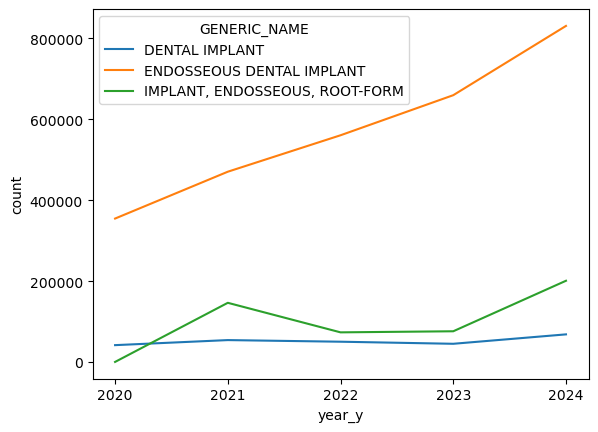

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(data=df_trend, x="year_y", y="count", hue="GENERIC_NAME")

In [5]:
df_DentImp = df[df['GENERIC_NAME']=='DENTAL IMPLANT']

In [6]:
df_DentImp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260103 entries, 0 to 3634620
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   MDR_REPORT_KEY                  260103 non-null  object
 1   DEVICE_EVENT_KEY                0 non-null       object
 2   IMPLANT_FLAG                    0 non-null       object
 3   DATE_REMOVED_FLAG               0 non-null       object
 4   DEVICE_SEQUENCE_NO              260103 non-null  object
 5   DATE_RECEIVED                   260103 non-null  object
 6   BRAND_NAME                      256659 non-null  object
 7   GENERIC_NAME                    260103 non-null  object
 8   MANUFACTURER_D_NAME             259986 non-null  object
 9   MANUFACTURER_D_ADDRESS_1        259983 non-null  object
 10  MANUFACTURER_D_ADDRESS_2        6570 non-null    object
 11  MANUFACTURER_D_CITY             260001 non-null  object
 12  MANUFACTURER_D_STATE_CODE       22

In [7]:
df_DentImp["MANUFACTURER_D_NAME"].value_counts()

MANUFACTURER_D_NAME
IMPLANT DIRECT SYBRON MANUFACTURING LLC    62546
BIOHORIZONS IMPLANT SYSTEMS                55364
ZIMMER DENTAL                              51180
BIOHORIZONS INC.                           37350
BIOMET 3I                                  24689
                                           ...  
ALATATEC                                       1
ALTATEC IMPLANT                                1
NASSIF & ASSOCIATES                            1
KEYSTONE DENTAL INC                            1
INTEGRATED DENTAL SYSTEMS                      1
Name: count, Length: 88, dtype: int64

In [8]:
import spacy

print(spacy.__version__)

3.4.4


In [62]:
!pip install scispacy==0.5.2

In [64]:
# Will attempt to fetch the correct version for your spaCy
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.3/460.3 MB 11.7 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 6.6 MB/s eta 0:00:00a 0:00:01m
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.49.0
    Uninstalling transformers-4.49.0:
      Successfully uninstalled transformers-4.49.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [56]:
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_lg-0.5.4.tar.gz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.2/531.2 MB 1.6 MB/s eta 0:00:0000:0100:07
  Preparing metadata (setup.py) ... done
  Using cached spacy-3.7.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (27 kB)
  Using cached thinc-8.2.5-cp311-cp311-macosx_11_0_arm64.whl.metadata (15 kB)
Using cached spacy-3.7.5-cp311-cp311-macosx_11_0_arm64.whl (6.5 MB)
Using cached thinc-8.2.5-cp311-cp311-macosx_11_0_arm64.whl (773 kB)
  Created wheel for en_core_sci_lg: filename=en_core_sci_lg-0.5.4-py3-none-any.whl size=531476572 sha256=01ad763862a4acfd9fba3bbc7be4948a81cec36194aa360dcdbd5e8d414dd96e
  Stored in directory: /Users/zhaozibo/Library/Caches/pip/wheels/d6/b1/2f/ce1b43e2194a41a5c93baa170fd8cb638e4938a068a7190068
Successfully built en_core_sci_lg
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.12
    Uninstalling thinc-8.1.12:
      Successfully uninstalled thinc-8.1.12
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spac

In [66]:
!pip install spacy-transformers

In [11]:
import pandas as pd
import spacy
from collections import Counter
from tqdm import tqdm  # For tracking progress

# Load the standard spaCy model with only NER enabled
nlp = spacy.load("en_core_web_sm", disable=["tagger", "parser"])

# Assuming df_merged is your dataframe and contains an FOI_TEXT column
# Extract non-null values from the FOI_TEXT column
foi_texts = df_DentImp["FOI_TEXT"].dropna().tolist()

# Use spaCy's efficient nlp.pipe for batch processing
entities = []
for doc in tqdm(nlp.pipe(foi_texts, batch_size=100, n_process=8), total=len(foi_texts)):
    entities.extend([ent.text for ent in doc.ents])

# Count entity frequencies
entity_counts = Counter(entities)

# Convert to DataFrame for visualization
df_entities = pd.DataFrame(entity_counts.items(), columns=["Entity", "Frequency"])

/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/opt/anaconda3/envs/NLP/lib/python3.11/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnin

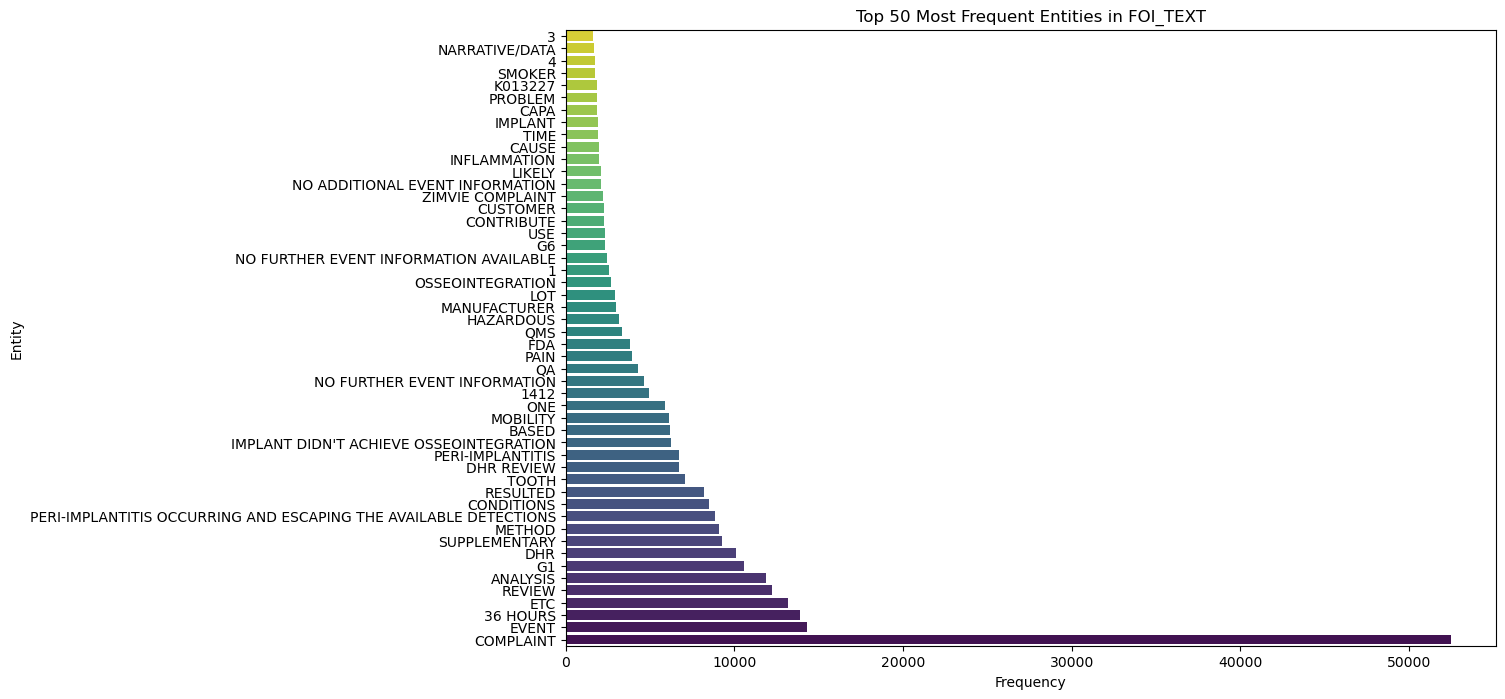

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 50 most frequent entities
df_top_entities = df_entities.nlargest(50, "Frequency")

# Create bar plot with proper hue assignment
plt.figure(figsize=(12, 8))
sns.barplot(y="Entity", x="Frequency", data=df_top_entities, palette="viridis", hue="Entity", legend=False)

# Labels and title
plt.xlabel("Frequency")
plt.ylabel("Entity")
plt.title("Top 50 Most Frequent Entities in FOI_TEXT")
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show plot
plt.show()

/var/folders/_6/bkb79v1n1qgb5pjgnzbz79nw0000gn/T/ipykernel_36849/336227705.py:78: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(10, "Report_Count"))


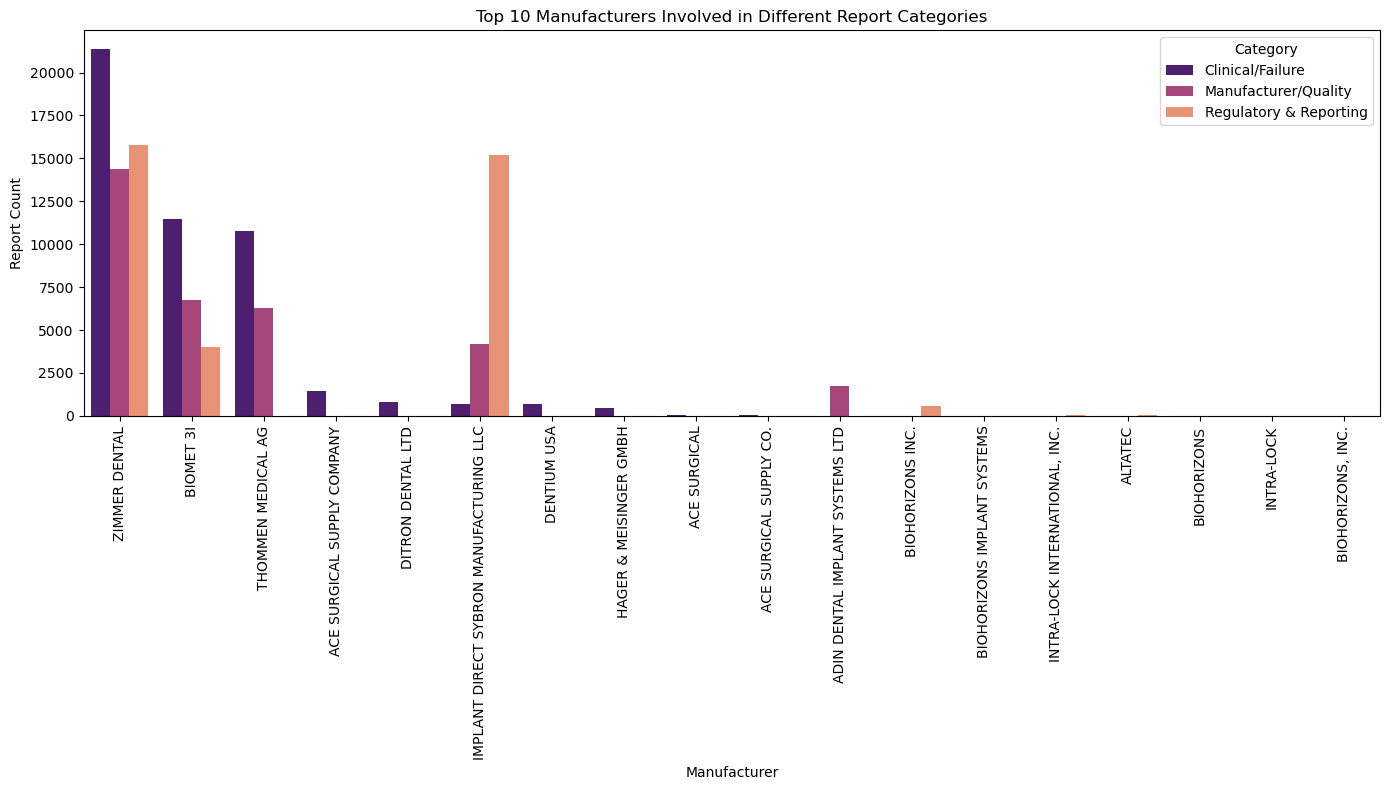

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ----------------------------------------------------------------------
# 1. Define your keyword categories based on the bar chart's top entities
#    (Add or remove items to reflect your actual data.)
# ----------------------------------------------------------------------

manufacturer_quality = [
    "MANUFACTURER", "ZIMVIE COMPLAINT", "LOT", "HAZARDOUS",
    "CAPA", "DHR REVIEW", "IMPLANT DIDN'T ACHIEVE OSSEOINTEGRATION"
]

regulatory = [
    "PMA", "FDA", "NO FURTHER EVENT INFORMATION", "CMS",
    "QA", "SUPPLEMENTARY", "1412", "NO ADDITIONAL EVENT INFORMATION"
]

clinical_failure = [
    "PERI-IMPLANTITIS", "MOBILITY", "PAIN", "INFLAMMATION",
    "OSSEOINTEGRATION", "SMOKER", "TOOTH"
    # (IMPLANT DIDN'T ACHIEVE OSSEOINTEGRATION could also be here; it's borderline)
]

# general_filler = [
#     "COMPLAINT", "EVENT", "REVIEW", "ANALYSIS", "METHOD", 
#     "TIME", "CAUSE", "USE", "NARRATIVE/DATA", "PROBLEM",
#     "ONE", "4", "3", "ETC", "CONTRIBUTE", "CUSTOMER",
#     "LIKELY", "G4", "G6"
# ]

# Combine them in a dictionary for your analysis
category_keywords = {
    "Manufacturer/Quality": manufacturer_quality,
    "Regulatory & Reporting": regulatory,
    "Clinical/Failure": clinical_failure,
    # "General/Filler": general_filler
}

# ----------------------------------------------------------------------
# 2. Build a DataFrame to hold the final tally:
#    - We'll filter df_DentImp by each category's keywords,
#    - Count how many times each manufacturer appears for that category,
#    - Then concatenate results across categories.
# ----------------------------------------------------------------------

df_all_categories = pd.DataFrame()

for category, keywords in category_keywords.items():
    # Make a regex pattern that matches any keyword (case-insensitive)
    pattern = "|".join(keywords)
    
    # Filter FOI_TEXT containing any of these keywords
    df_filtered = df_DentImp[
        df_DentImp["FOI_TEXT"].str.contains(pattern, case=False, na=False)
    ]
    
    # Count how many times each manufacturer appears
    manufacturer_counts = df_filtered["MANUFACTURER_D_NAME"].value_counts()
    
    # Convert that to a DataFrame
    df_counts = pd.DataFrame({
        "Manufacturer": manufacturer_counts.index,
        "Report_Count": manufacturer_counts.values,
        "Category": category
    })
    
    # Add to our master table
    df_all_categories = pd.concat([df_all_categories, df_counts], ignore_index=True)

# ----------------------------------------------------------------------
# 3. (Optional) Select the top 10 manufacturers per category
# ----------------------------------------------------------------------
df_top_all = (
    df_all_categories
    .groupby("Category", group_keys=True)
    .apply(lambda x: x.nlargest(10, "Report_Count"))
    .reset_index(drop=True)
)

# ----------------------------------------------------------------------
# 4. Plot with Seaborn (Grouped Bar Chart)
# ----------------------------------------------------------------------
plt.figure(figsize=(14, 8))
sns.barplot(
    x="Manufacturer",
    y="Report_Count",
    hue="Category",
    data=df_top_all,
    palette="magma"
)

plt.xlabel("Manufacturer")
plt.ylabel("Report Count")
plt.title("Top 10 Manufacturers Involved in Different Report Categories")
plt.xticks(rotation=90)  # rotate manufacturer names for clarity
plt.legend(title="Category")

plt.tight_layout()
plt.show()

In [15]:
import pandas as pd

# Reuse or define your "Manufacturer/Quality" keywords
manufacturer_quality = [
    "MANUFACTURER", "ZIMVIE COMPLAINT", "LOT", "HAZARDOUS",
    "CAPA", "DHR REVIEW", "IMPLANT DIDN'T ACHIEVE OSSEOINTEGRATION"
]

# Create a single regex for Manufacturer/Quality only
pattern_mfg = "|".join(manufacturer_quality)

# Filter rows containing any of these keywords in FOI_TEXT
df_mfg_filtered = df_DentImp[
    df_DentImp["FOI_TEXT"].str.contains(pattern_mfg, case=False, na=False)
]

# Count the total occurrences per manufacturer
mfg_counts = df_mfg_filtered["MANUFACTURER_D_NAME"].value_counts()

# Get the top 3 manufacturer names
top_3_manufacturers = mfg_counts.head(3).index.tolist()
print("Top 3 Manufacturer/Quality manufacturers:")
for i, m in enumerate(top_3_manufacturers, start=1):
    print(f"{i}. {m}")

Top 3 Manufacturer/Quality manufacturers:
1. ZIMMER DENTAL
2. BIOMET 3I
3. THOMMEN MEDICAL AG


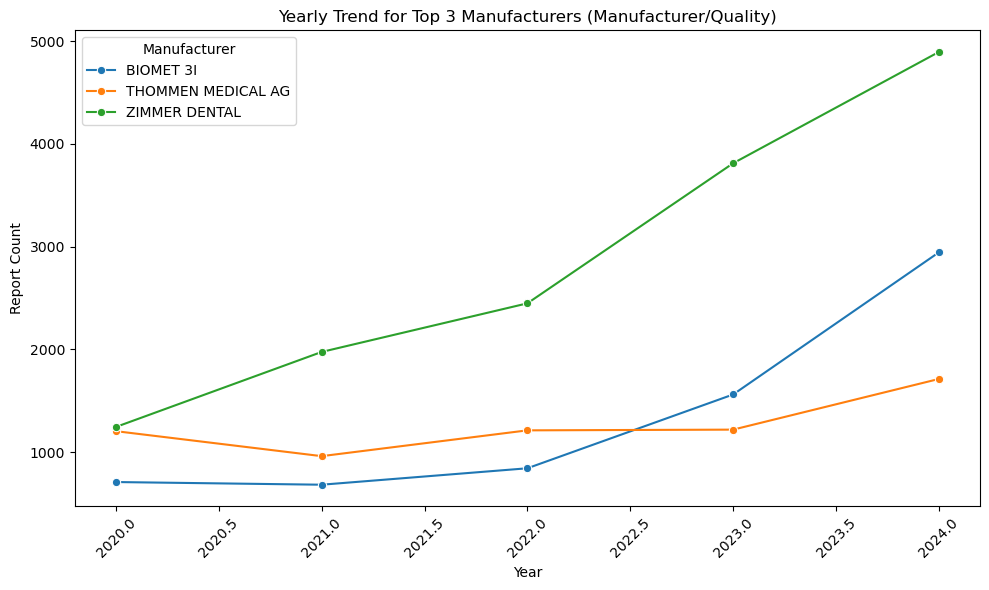

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Restrict df_mfg_filtered to only those top 3 manufacturers
df_top_3 = df_mfg_filtered[
    df_mfg_filtered["MANUFACTURER_D_NAME"].isin(top_3_manufacturers)
].copy()

# Ensure 'year_x' is numeric (if it's stored as string/object)
# If your year column is named differently (e.g. 'year_y'), adjust accordingly
df_top_3["year_x"] = pd.to_numeric(df_top_3["year_x"], errors="coerce")

# Group by (year, manufacturer)
df_yearly = (
    df_top_3
    .groupby(["year_x", "MANUFACTURER_D_NAME"])
    .size()
    .reset_index(name="Report_Count")
)

# Sort by year to keep the line plot in chronological order
df_yearly = df_yearly.sort_values(["year_x", "MANUFACTURER_D_NAME"])

# Now we can plot
plt.figure(figsize=(10,6))
sns.lineplot(
    data=df_yearly,
    x="year_x",
    y="Report_Count",
    hue="MANUFACTURER_D_NAME",
    marker="o"  # optional, shows data points
)

plt.title("Yearly Trend for Top 3 Manufacturers (Manufacturer/Quality)")
plt.xlabel("Year")
plt.ylabel("Report Count")
plt.legend(title="Manufacturer")
plt.xticks(rotation=45)  # if you have many years, rotating helps

plt.tight_layout()
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define keyword categories
medical_keywords = [
    "Infection", "Diabetes", "Poor Bone Quality", "Tooth Site",
    "Osseointegration", "Smoking", "Including Medical Conditions"
]
failure_keywords = [
    "Non-Conformances", "Failure", "Non-Design or Manufacturing Related",
    "Manufacturing or", "External Factors", "Surgical Technique", "Escaping"
]
regulatory_keywords = [
    "FDA", "DHR", "An Additional Report Will Be Submitted"
]

# Dictionary to store results
manufacturer_analysis = {
    "Medical Conditions": medical_keywords,
    "Failure Reports": failure_keywords,
    "Regulatory & Reporting": regulatory_keywords
}

# DataFrame to store all manufacturers with category labels
df_all_manufacturers = pd.DataFrame()

# Loop through each category and analyze manufacturers
for category, keywords in manufacturer_analysis.items():
    # Filter reports containing any keyword in the category
    df_filtered = df_DentImp[df_DentImp["FOI_TEXT"].str.contains('|'.join(keywords), case=False, na=False)]

    # Count occurrences of manufacturers
    manufacturer_counts = df_filtered["MANUFACTURER_D_NAME"].value_counts()

    # Convert to DataFrame for visualization
    df_counts = pd.DataFrame({
        "Manufacturer": manufacturer_counts.index,
        "Report_Count": manufacturer_counts.values,
        "Category": category
    })

    # Append to the final DataFrame
    df_all_manufacturers = pd.concat([df_all_manufacturers, df_counts])

# Select top 10 manufacturers per category
df_top_all = df_all_manufacturers.groupby("Category").apply(lambda x: x.nlargest(10, "Report_Count")).reset_index(drop=True)

/var/folders/_6/bkb79v1n1qgb5pjgnzbz79nw0000gn/T/ipykernel_36849/2682947512.py:47: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_top_all = df_all_manufacturers.groupby("Category").apply(lambda x: x.nlargest(10, "Report_Count")).reset_index(drop=True)


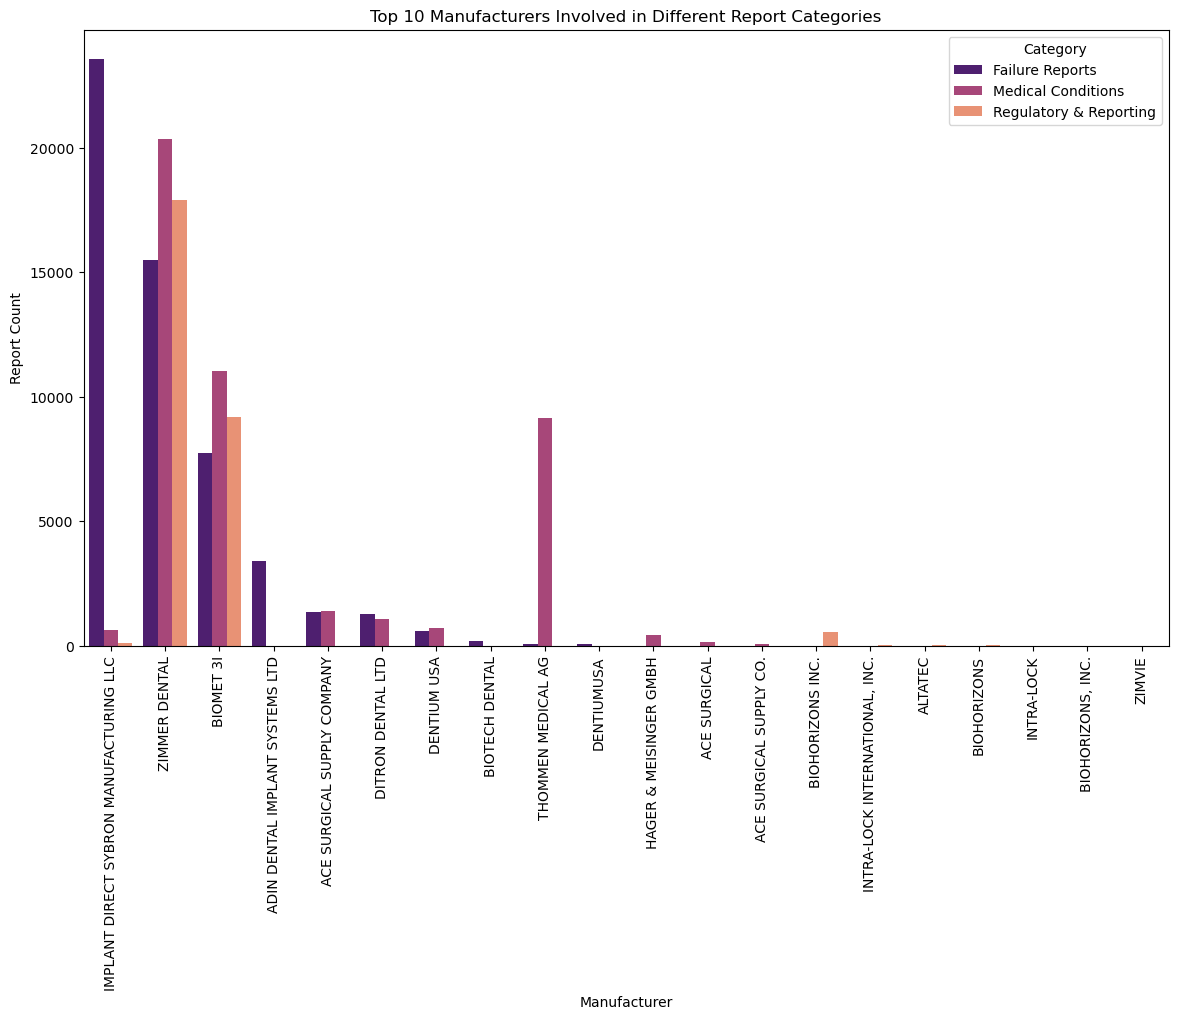

In [26]:
# Create bar plot
plt.figure(figsize=(14, 8))
sns.barplot(x="Manufacturer", y="Report_Count", hue="Category", data=df_top_all, palette="magma")
plt.xlabel("Manufacturer")
plt.ylabel("Report Count")
plt.title("Top 10 Manufacturers Involved in Different Report Categories")
plt.xticks(rotation=90)  # Rotate manufacturer names for better visibility
plt.legend(title="Category")
# plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Show the plot
plt.show()

In [7]:
df_dental_implant = df[df["GENERIC_NAME"]=="DENTAL IMPLANT"].copy()

In [8]:
df_dental_implant.info()

<class 'pandas.core.frame.DataFrame'>
Index: 260103 entries, 0 to 3634620
Data columns (total 38 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   MDR_REPORT_KEY                  260103 non-null  object
 1   DEVICE_EVENT_KEY                0 non-null       object
 2   IMPLANT_FLAG                    0 non-null       object
 3   DATE_REMOVED_FLAG               0 non-null       object
 4   DEVICE_SEQUENCE_NO              260103 non-null  object
 5   DATE_RECEIVED                   260103 non-null  object
 6   BRAND_NAME                      256659 non-null  object
 7   GENERIC_NAME                    260103 non-null  object
 8   MANUFACTURER_D_NAME             259986 non-null  object
 9   MANUFACTURER_D_ADDRESS_1        259983 non-null  object
 10  MANUFACTURER_D_ADDRESS_2        6570 non-null    object
 11  MANUFACTURER_D_CITY             260001 non-null  object
 12  MANUFACTURER_D_STATE_CODE       22